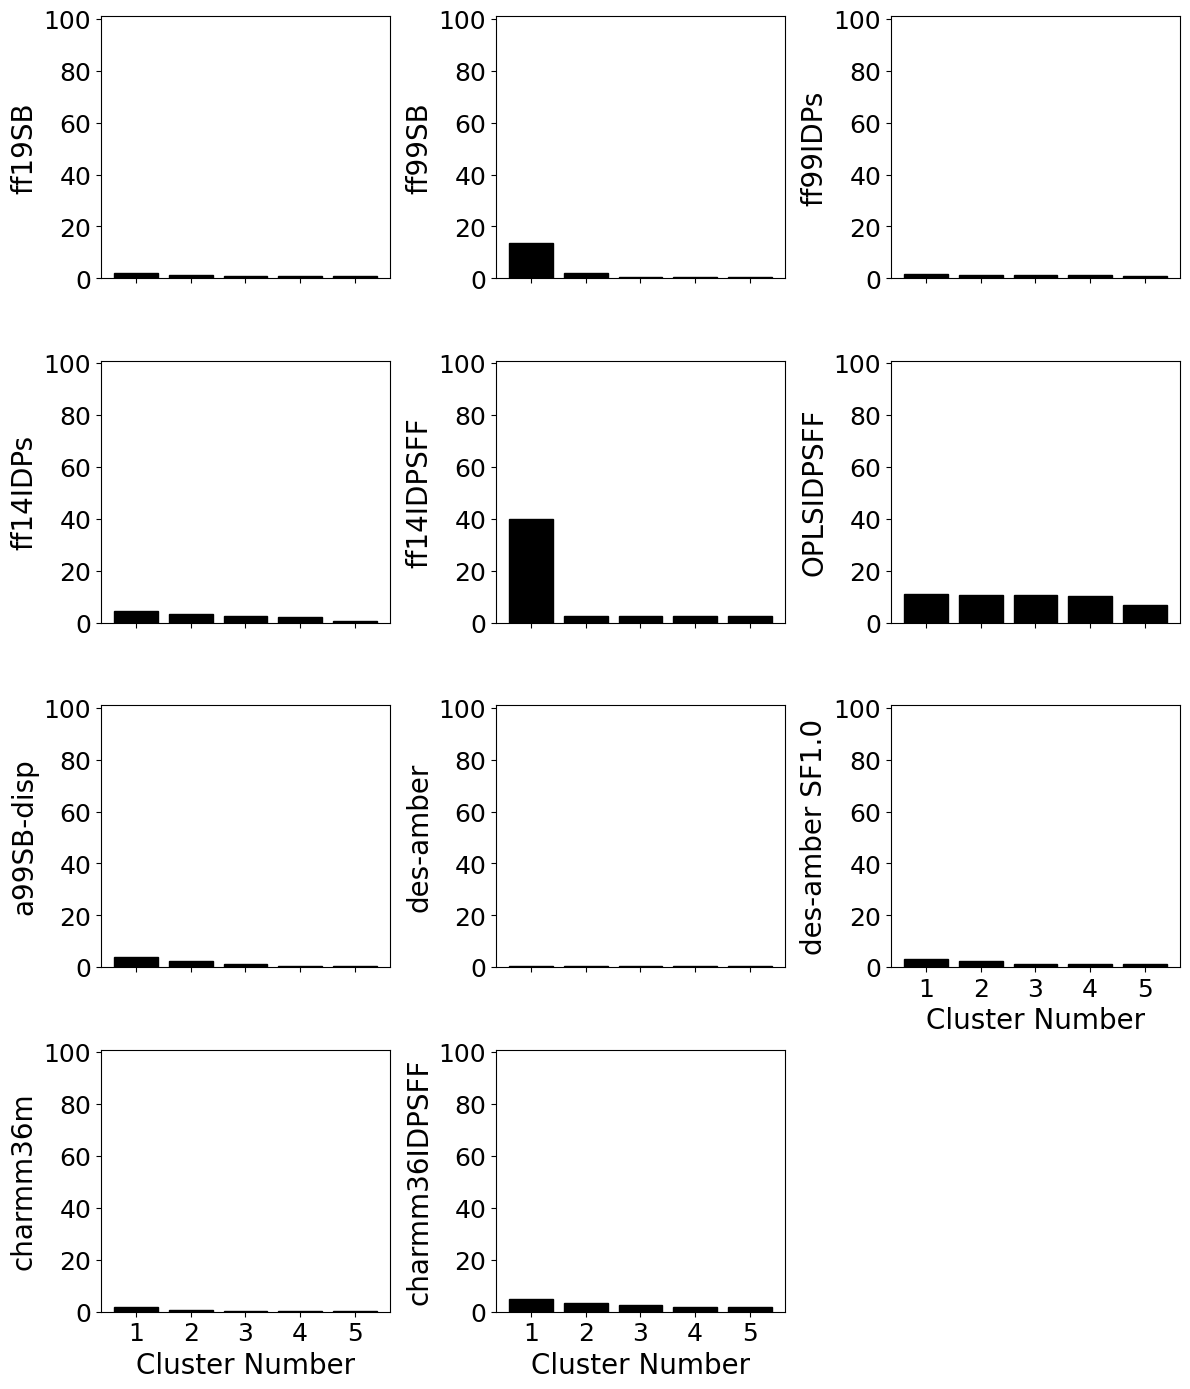

{'ff19SB': [2.1999999999999997, 1.2, 1.0, 0.8, 0.8], 'ff99SB': [13.5, 1.9, 0.6, 0.4, 0.4], 'ff99IDPs': [1.7999999999999998, 1.3, 1.2, 1.2, 1.0999999999999999], 'ff14IDPs': [4.7, 3.4000000000000004, 2.5, 2.4, 0.6], 'ff14IDPSFF': [39.800000000000004, 2.8000000000000003, 2.8000000000000003, 2.7, 2.7], 'OPLSIDPSFF': [11.1, 10.8, 10.8, 10.4, 6.7], 'a99SB-disp': [4.0, 2.4, 1.2, 0.6, 0.5], 'des-amber': [0.4, 0.4, 0.4, 0.4, 0.3], 'des-amber SF1.0': [3.2, 2.5, 1.3, 1.3, 1.2], 'charmm36m': [1.7000000000000002, 0.6, 0.4, 0.3, 0.3], 'charmm36IDPSFF': [4.9, 3.2, 2.4, 1.9, 1.7000000000000002]}


In [8]:
import os
import matplotlib.pyplot as plt
import numpy as np
# Function to read summary files and extract the population data for clusters 0-4
def extract_cluster_populations(ff_dir):
    populations = [0, 0, 0, 0, 0]
    summary_file = os.path.join(ff_dir, 'summary')
    if os.path.exists(summary_file):
        with open(summary_file, 'r') as file:
            for line in file:
                if line.startswith("#Cluster"):
                    continue
                parts = line.split()
                cluster = int(parts[0])
                frac = float(parts[2])
                if 0 <= cluster <= 4:
                    populations[cluster] = frac * 100  # Convert to %
    return populations
# Forcefield directories (update paths as needed)
forcefields = {
    "ff19SB": "ff19SB",
    "ff99SB": "ff99SB",
    "ff99IDPs": "ff99IDPs",
    "ff14IDPs": "ff14IDPs",
    "ff14IDPSFF": "ff14IDPSFF",
    "OPLSIDPSFF": "OPLSIDPSFF",
    "a99SB-disp": "a99SBdisp",
    "des-amber": "des-amber",
    "des-amber SF1.0": "des-amber-SF1.0",
    "charmm36m": "charmm36m/amber",
    "charmm36IDPSFF": "charmm36IDPSFF",
}
clusters = np.arange(5)  # Clusters 0-4
# Extract data
populations_dict = {ff: extract_cluster_populations(ff_dir) for ff, ff_dir in forcefields.items()}
# Create 4x3 grid of subplots
fig, axs = plt.subplots(4, 3, figsize=(12, 14), sharex=True)
axs = axs.flatten()
# Plot only first 11 subplots with data
for i, (ff, populations) in enumerate(populations_dict.items()):
    ax = axs[i]
    colors = ['black' for _ in populations]
    ax.bar(clusters, populations, color=colors, edgecolor='black')
    ax.set_ylabel(ff, fontsize=22)
    ax.set_ylim(0, 101)
    ax.set_yticks(np.arange(0, 101, 20))
    ax.set_xticks(clusters)
    ax.tick_params(axis='both', labelsize=18)
# Turn off the 12th subplot (make it completely blank)
axs[-1].axis('off')

# Show x-axis labels only for plots 8, 9, 10 (last row)

for i, ax in enumerate(axs[:11]):
    ax.set_xticks(clusters)  # Ensure ticks are set
    if i in [8, 9, 10]:  # Keep labels for bottom row
        ax.set_xlabel("Cluster Number", fontsize=20)
        ax.tick_params(labelbottom=True)
        ax.set_xticklabels(clusters+1, fontsize=18)  # Restore tick labels
    else:
        ax.set_xticklabels([])

for i, ff in enumerate(populations_dict.keys()):
    axs[i].set_ylabel(ff, fontsize=20)

# Final layout and save
plt.tight_layout()
plt.savefig("clusters-folded.png", dpi=600)
plt.show()
# Print cluster populations
print(populations_dict)